1. Sports plays a vital role for a healthy brain. 
2. You are supposed to collect data of two group of students  (i) those who play a physical game, (ii) those who play online/video games
3. Test the hypothesis that there is no difference in performance between the Physical Game  players vs Online/Video Game players. Use 5% level of significance. 
4. Visit University students of both categories of having different semesters and programs across the university. 
5. Design an Survey profrma and collect data related such as Name, Class, Semester,  current CGPA, how much time spent time in sports,  living in hostel or a day scholar etc. 
6. Ask them to provide you the cell numbers so that I can cross check the varsity of your collected data. 
7. You cannot use the same data of a group who have collected the data. 
8. The sample size should be of 30 ( 15 each category).
`

In [70]:
#1. Sports plays a vital role for a healthy brain. 
#2. You are supposed to collect data of two group of students  (i) those who play a physical game, (ii) those who play online/video games
#3. Test the hypothesis that there is no difference in performance between the Physical Game  players vs Online/Video Game players. Use 5% level of significance. 
#4. Visit University students of both categories of having different semesters and programs across the university. 
#5. Design an Survey profrma and collect data related such as Name, Class, Semester,  current CGPA, how much time spent time in sports,  living in hostel or a day scholar etc. 
#6. Ask them to provide you the cell numbers so that I can cross check the varsity of your collected data. 
#7. You cannot use the same data of a group who have collected the data. 
#8. The sample size should be of 30 ( 15 each category).

## Importing Required Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


In [72]:
#Creating dataframes for Physical Game Players and Online/Video Game Players

#importing data from csv file

data = pd.read_csv('online_games.csv')
data.head()

,ID,Name,Phone Number,Department,Semester,Current CGPA,Gender,Choose any of the following,how important is gaming to you as a leisure activity?,how competitive are the games you usually play?,how often do you play games with friends or in multiplayer mode?,how much do you spend on in-game purchases or microtransactions?,how much do you feel gaming impacts your academic or work
0,2,Muhammad Ahmad Mahmood,+923325106960,BSCS,8th,3.20,Man,Online Games,4,3,4,1,4
1,4,Awais Mehmood,0318544845,CS,8th,4.00,Man,Online Games,4,4,5,2,3
2,5,Abdul Wahab,03325505535,CS,8th,2.95,Man,Online Games,4,5,5,3,4
3,6,Mah Rukh,03309890516,CS,6th,3.32,Woman,Online Games,1,2,2,1,1
4,8,Muhammad Yusha Shams,0312-8632140,Electrical Engineering Electronics,6th,2.53,Man,Online Games,4,3,1,1,4


In [73]:
#removing phone number column
data = data.drop('Phone Number', axis=1)

#removing id column
data = data.drop('ID', axis=1)


data.head()

,Name,Department,Semester,Current CGPA,Gender,Choose any of the following,how important is gaming to you as a leisure activity?,how competitive are the games you usually play?,how often do you play games with friends or in multiplayer mode?,how much do you spend on in-game purchases or microtransactions?,how much do you feel gaming impacts your academic or work
0,Muhammad Ahmad Mahmood,BSCS,8th,3.20,Man,Online Games,4,3,4,1,4
1,Awais Mehmood,CS,8th,4.00,Man,Online Games,4,4,5,2,3
2,Abdul Wahab,CS,8th,2.95,Man,Online Games,4,5,5,3,4
3,Mah Rukh,CS,6th,3.32,Woman,Online Games,1,2,2,1,1
4,Muhammad Yusha Shams,Electrical Engineering Electronics,6th,2.53,Man,Online Games,4,3,1,1,4


In [74]:
# replcing the attribute name with short name

#Replacing Name with name
data = data.rename(columns = {'Name':'name'})

#Replacing Department with department
data = data.rename(columns = {'Department':'department'})

#Replacing Semester with semester
data = data.rename(columns = {'Semester':'semester'})

#Replacing Current CGPA with cgpa
data = data.rename(columns = {'Current CGPA':'cgpa'})

#Replacing Gender with gender

data = data.rename(columns = {'Gender': 'gender'})
                   
#Replacing Choose any of the following with game_type

data = data.rename(columns = {'Choose any of the following':'game_type'})


data = data.rename(columns = {'how important is gaming to you as a leisure activity?':'activity_importance'})


#how competitive are the games you usually play?

data = data.rename(columns = {'how competitive are the games you usually play?':'game_competitiveness'})


#how often do you play games with friends or in multiplayer mode?

data = data.rename(columns = {'how often do you play games with friends or in multiplayer mode?':'multiplayer_mode'})
                   

#hhow much do you spend on in-game purchases or microtransactions?

data = data.rename(columns = {'how much do you spend on in-game purchases or microtransactions?':'microtransactions'})


#how much do you feel gaming impacts your academic or work

data = data.rename(columns = {'how much do you feel gaming impacts your academic or work':'academic_impact'})




In [75]:
data.head()

,name,department,semester,cgpa,gender,game_type,activity_importance,game_competitiveness,multiplayer_mode,microtransactions,academic_impact
0,Muhammad Ahmad Mahmood,BSCS,8th,3.20,Man,Online Games,4,3,4,1,4
1,Awais Mehmood,CS,8th,4.00,Man,Online Games,4,4,5,2,3
2,Abdul Wahab,CS,8th,2.95,Man,Online Games,4,5,5,3,4
3,Mah Rukh,CS,6th,3.32,Woman,Online Games,1,2,2,1,1
4,Muhammad Yusha Shams,Electrical Engineering Electronics,6th,2.53,Man,Online Games,4,3,1,1,4


In [76]:
#Creating dataframes for Physical Game Players

data1 = pd.read_csv('physical_games.csv')
data1.head()


,ID,Name,Phone Number,Department,Semester,Current CGPA,Gender,Choose any of the following,"how important is physical activity (sports, exercise) to you?",how motivated are you to engage in physical activities regularly?,how satisfied are you with your current level of physical fitness?,how often do you engage in sports or physical activities with friends or in groups?,how much do you feel physical activity positively impacts your overall well-being?
0,1,Ayesha kiddo,+923110740520,Bscs,8th,3.75,Woman,Physical Games,4,3,4,4,4
1,3,Bisma,03465166777,BSCS,8th,3.48,Woman,Physical Games,5,5,4,4,4
2,7,Ayesha Malik,03072870027,Computer Science,4th,3.55,Woman,Physical Games,5,4,4,4,5
3,10,Muhammad Junaid Ali,03335193178,BSCS-2C,2nd,2.47,Man,Physical Games,3,1,2,1,4
4,15,Shaheryar,03155430714,CT,4th,3.34,Man,Physical Games,5,5,3,1,5


In [77]:
#removing phone number column
data1 = data1.drop('Phone Number', axis=1)

#removing id column
data1 = data1.drop('ID', axis=1)


data1.head()

,Name,Department,Semester,Current CGPA,Gender,Choose any of the following,"how important is physical activity (sports, exercise) to you?",how motivated are you to engage in physical activities regularly?,how satisfied are you with your current level of physical fitness?,how often do you engage in sports or physical activities with friends or in groups?,how much do you feel physical activity positively impacts your overall well-being?
0,Ayesha kiddo,Bscs,8th,3.75,Woman,Physical Games,4,3,4,4,4
1,Bisma,BSCS,8th,3.48,Woman,Physical Games,5,5,4,4,4
2,Ayesha Malik,Computer Science,4th,3.55,Woman,Physical Games,5,4,4,4,5
3,Muhammad Junaid Ali,BSCS-2C,2nd,2.47,Man,Physical Games,3,1,2,1,4
4,Shaheryar,CT,4th,3.34,Man,Physical Games,5,5,3,1,5


In [78]:
#Replacing Name with name
data1 = data1.rename(columns = {'Name':'name'})

#Replacing Department with department
data1 = data1.rename(columns = {'Department':'department'})

#Replacing Semester with semester
data1 = data1.rename(columns = {'Semester':'semester'})

#Replacing Current CGPA with cgpa
data1 = data1.rename(columns = {'Current CGPA':'cgpa'})

#Replacing Gender with gender

data1 = data1.rename(columns = {'Gender': 'gender'})
                   
#Replacing Choose any of the following with game_type

data1 = data1.rename(columns = {'Choose any of the following':'game_type'})

In [79]:
data1.head()

,name,department,semester,cgpa,gender,game_type,"how important is physical activity (sports, exercise) to you?",how motivated are you to engage in physical activities regularly?,how satisfied are you with your current level of physical fitness?,how often do you engage in sports or physical activities with friends or in groups?,how much do you feel physical activity positively impacts your overall well-being?
0,Ayesha kiddo,Bscs,8th,3.75,Woman,Physical Games,4,3,4,4,4
1,Bisma,BSCS,8th,3.48,Woman,Physical Games,5,5,4,4,4
2,Ayesha Malik,Computer Science,4th,3.55,Woman,Physical Games,5,4,4,4,5
3,Muhammad Junaid Ali,BSCS-2C,2nd,2.47,Man,Physical Games,3,1,2,1,4
4,Shaheryar,CT,4th,3.34,Man,Physical Games,5,5,3,1,5


In [80]:
# how important is physical activity (sports, exercise) to you?

data1 = data1.rename(columns = {'how important is physical activity (sports, exercise) to you?':'activity_importance'})

#how important is physical activity (sports, exercise) to you?

data1 = data1.rename(columns = {'how competitive are the games you usually play?':'game_competitiveness'})

#how satisfied are you with your current level of physical fitness?

data1 = data1.rename(columns = {'how satisfied are you with your current level of physical fitness?':'physical_fitness'})

#how often do you engage in sports or physical activities with friends or in groups?

data1 = data1.rename(columns = {'how often do you engage in sports or physical activities with friends or in groups?':'group_activity'})

#how much do you feel physical activity positively impacts your overall well-being?

data1 = data1.rename(columns = {'how much do you feel physical activity positively impacts your overall well-being?':'well_being'})

#how motivated are you to engage in physical activities regularly?

data1 = data1.rename(columns = {'how motivated are you to engage in physical activities regularly?':'motivation'})


In [81]:
data1.head()

,name,department,semester,cgpa,gender,game_type,activity_importance,motivation,physical_fitness,group_activity,well_being
0,Ayesha kiddo,Bscs,8th,3.75,Woman,Physical Games,4,3,4,4,4
1,Bisma,BSCS,8th,3.48,Woman,Physical Games,5,5,4,4,4
2,Ayesha Malik,Computer Science,4th,3.55,Woman,Physical Games,5,4,4,4,5
3,Muhammad Junaid Ali,BSCS-2C,2nd,2.47,Man,Physical Games,3,1,2,1,4
4,Shaheryar,CT,4th,3.34,Man,Physical Games,5,5,3,1,5


In [82]:
#comaparing data of both groups

#comparing the data of both groups
data1.describe()
data.describe()

,cgpa,activity_importance,game_competitiveness,multiplayer_mode,microtransactions,academic_impact
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,3.104545,3.727273,3.545455,2.757576,1.787879,3.242424
std,0.399399,1.179850,1.120572,1.414883,1.139012,1.173411
min,2.090000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.920000,3.000000,3.000000,2.000000,1.000000,3.000000
50%,3.040000,4.000000,4.000000,3.000000,1.000000,3.000000
75%,3.330000,5.000000,4.000000,4.000000,3.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [83]:
online_data=data
physical_data=data1

In [84]:
online_data.describe()


,cgpa,activity_importance,game_competitiveness,multiplayer_mode,microtransactions,academic_impact
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,3.104545,3.727273,3.545455,2.757576,1.787879,3.242424
std,0.399399,1.179850,1.120572,1.414883,1.139012,1.173411
min,2.090000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.920000,3.000000,3.000000,2.000000,1.000000,3.000000
50%,3.040000,4.000000,4.000000,3.000000,1.000000,3.000000
75%,3.330000,5.000000,4.000000,4.000000,3.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [85]:
physical_data.describe()

,cgpa,activity_importance,motivation,physical_fitness,group_activity,well_being
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,3.276667,3.848485,3.242424,2.545455,2.636364,4.121212
std,0.378852,1.460334,1.346994,1.092329,1.318574,1.218544
min,2.470000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000,1.000000,4.000000
50%,3.340000,5.000000,3.000000,3.000000,3.000000,4.000000
75%,3.480000,5.000000,4.000000,3.000000,4.000000,5.000000
max,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000


In [86]:
#counting data in both groups
online_data.count()



name                    33
department              33
semester                33
cgpa                    33
gender                  33
game_type               33
activity_importance     33
game_competitiveness    33
multiplayer_mode        33
microtransactions       33
academic_impact         33
dtype: int64

In [87]:
physical_data.count()


name                   33
department             33
semester               33
cgpa                   33
gender                 33
game_type              33
activity_importance    33
motivation             33
physical_fitness       33
group_activity         33
well_being             33
dtype: int64

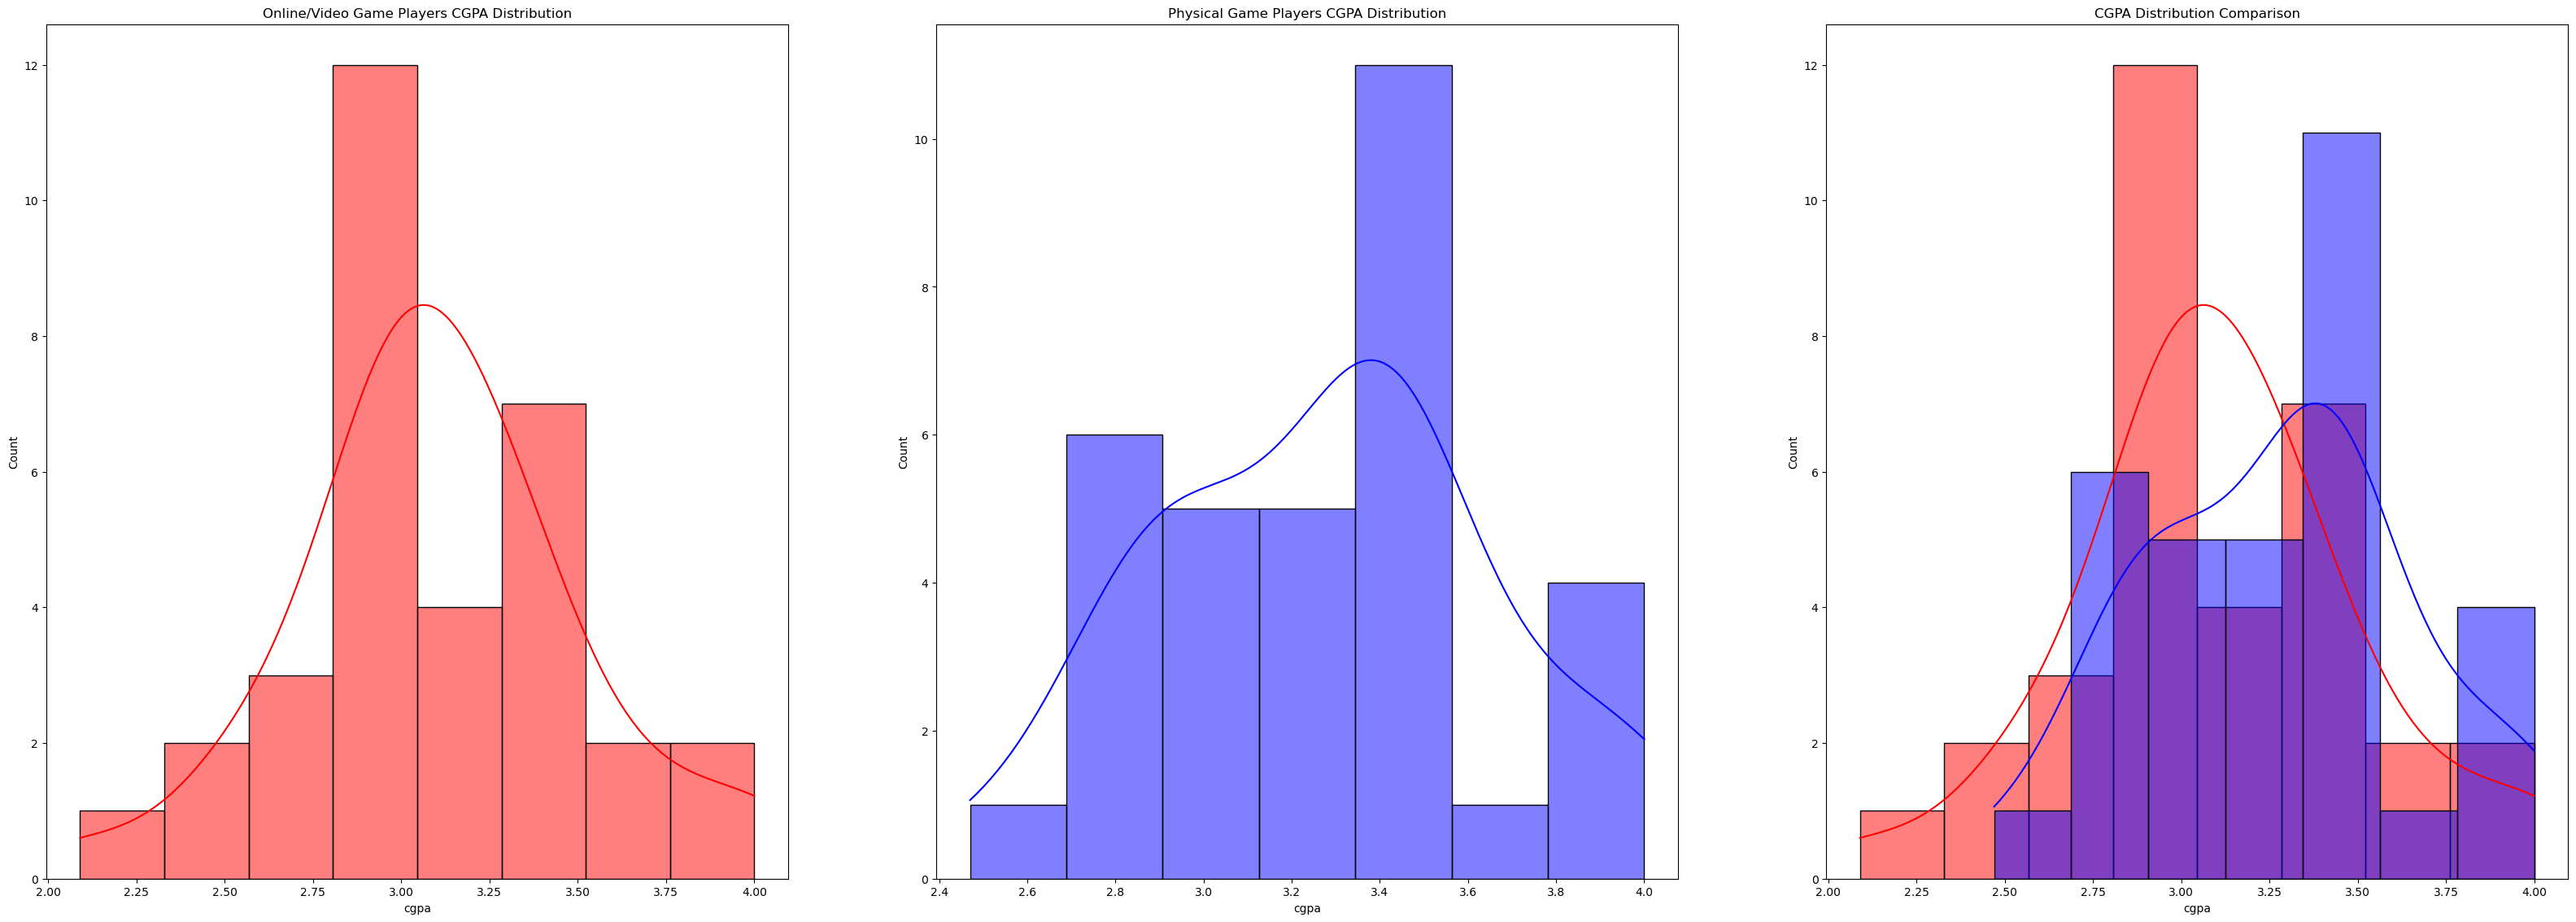

In [88]:
#  hypothesis that there is no difference in performance between the Physical Game  players vs Online/Video Game players. Use 5% level of significance. 


# Null Hypothesis: There is no difference in performance between the Physical Game players vs Online/Video Game players
# Alternative Hypothesis: There is a difference in performance between the Physical Game players vs Online/Video Game players

#Checking the normality of the data
plt.figure(figsize=(40,30))
plt.subplot(2, 3, 1)
sns.histplot(online_data['cgpa'], kde=True, color='red')
plt.title('Online/Video Game Players CGPA Distribution')

plt.subplot(2, 3, 2)
sns.histplot(physical_data['cgpa'], kde=True, color='blue')
plt.title('Physical Game Players CGPA Distribution')

plt.subplot(2, 3, 3)
sns.histplot(online_data['cgpa'], kde=True, color='red')
sns.histplot(physical_data['cgpa'], kde=True, color='blue')
plt.title('CGPA Distribution Comparison')

plt.show()


In [93]:
from scipy.stats import shapiro
# Shapiro-Wilk Test for Normality
# Null Hypothesis: The data is normally distributed
# Alternative Hypothesis: The data is not normally distributed

# Perform Shapiro-Wilk test for normality

#the  shapiro test is used to check the normality of the data 
#more close to 100 

phy_statistic, phy_p_value = shapiro(online_data['cgpa'])

online_statistic, online_p_value = shapiro(physical_data['cgpa'])

print('Shapiro-Wilk Test Statistic for Physical:', phy_statistic)
print('Shapiro-Wilk Test p-value for Physical:', phy_p_value)

print('Shapiro-Wilk Test Statistic for online:', online_statistic)
print('Shapiro-Wilk Test p-value for online:', online_p_value)





Shapiro-Wilk Test Statistic for Physical: 0.9632468223571777
Shapiro-Wilk Test p-value for Physical: 0.31847986578941345
Shapiro-Wilk Test Statistic for online: 0.9704683423042297
Shapiro-Wilk Test p-value for online: 0.4932405948638916


In [89]:
#hypthesis testing using t-test 
t_statistic, p_value=ttest_ind(online_data['cgpa'], physical_data['cgpa'])

print('t-statistic:', t_statistic)
print('p-value:', p_value)





t-statistic: -1.7961198281890256
p-value: 0.07719546476094716


In [68]:
# the  p-value os 0.077 its mean 
# p-value > 0.05


In [90]:
#setting alpha 

alpha = 0.05

if p_value < alpha:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null Hypothesis')


Fail to Reject the Null Hypothesis
